# Use emcee to run MCMC using Lya likelihood from BOSS P1D

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
# temporal
import camb
# our own modules
import simplest_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import camb_cosmo
import fit_linP
import recons_cosmo
import compute_likelihood
import emcee

## Setup Lya likelihood function

In [2]:
# read P1D measurement
basedir='../../p1d_data/data_files/PD2013/'
data=data_PD2013.P1D_PD2013(basedir=basedir,blind_data=False)
zs=data.z
Nz=len(zs)

In [50]:
# load P1D emulator
basedir='/Users/font/CosmoData/test_sim_emulator/test_medium/'
#basedir='../mini_sim_suite/'
p1d_label='test_p1d'
skewers_label='Ns100_wM0.05'
emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,verbose=True)

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 2, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'alpha_star': {'ip': 3, 'min_val': -0.265, 'max_val': -0.165, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\alpha_\\star$'}, 'mu_He': {'ip': 4, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}, 'mu_H': {'ip': 5, 'min_val': 0.5, 'max_val': 2.0, '   latex': '$\\mu_{\\rm H}$'}}, 'nsamples': 10, 'samples': {'0': [0.96, 0.32, -2.325, -0.22, 0.875, 1.7750000000000001], '1': [0.966, 0.4, -2.295, -0.23, 1.175, 0.575], '2': [0.968, 0.36, -2.285, -0.26, 1.7750000000000001, 1.625], '3': [0.97, 0.3, -2.315, -0.18, 1.3250000000000002, 1.3250000000000002], '4': [0.974, 0.34, -2.305, -0.21000000000000002, 1.475, 1.175], '5': [

In [40]:
# setup nuisance models
mf_model=mean_flux_model.MeanFluxModel()
T_model=thermal_model.ThermalModel()

In [41]:
# specify cosmology
cosmo = camb_cosmo.get_cosmology(mnu=0.15, ns=0.965, omch2=0.12)
# print relevant information about the cosmology object
camb_cosmo.print_info(cosmo)
# compute linear power parameters, around z_star and kp_kms
z_star=3.0
kp_kms=0.009
linP_model=fit_linP.LinearPowerModel(cosmo,z_star=z_star,k_units='kms',kp=kp_kms)
linP_model.get_params()

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.2000E-01, Omega_k = 0.0000E+00, Omega_nu h^2 = 1.6128E-03, T_CMB = 2.7255E+00, A_s = 2.1000E-09, n_s = 9.6500E-01, alpha_s = 0.0000E+00


{'Delta2_star': 0.34359089153174016,
 'alpha_star': -0.21586983258446132,
 'f_star': 0.97514327990258953,
 'g_star': 0.968209492732573,
 'n_star': -2.300572652881717}

In [6]:
# setup fiducial cosmology
cosmo_fid = camb_cosmo.get_cosmology()
# reconstruct cosmology using linear parameter model (at z_star, kp_kms)
rec_cosmo=recons_cosmo.ReconstructedCosmology(linP_model,cosmo_fid)
# compute linear power parameters at each redshift (in Mpc)
linP_Mpc_params=rec_cosmo.get_linP_Mpc_params(zs)

Note: redshifts have been re-sorted (earliest first)


In [55]:
chi2=compute_likelihood.get_chi2(data,cosmo_fid,emu,rec_cosmo,mf_model,T_model,linP_Mpc_params,extra_info=False)

asked to emulate model {'Delta2_p': 0.52940508668690001, 'n_p': -2.3007135087498813, 'alpha_p': -0.21576273788697528, 'f_p': 0.95899824656437238, 'mF': 0.80075859414516326, 'gamma': 1.5523173420452847, 'sigT_Mpc': 0.13071399425598651}
entry = 2342, z = 2.0000, Delta2_p = 0.5576, n_p = -2.3250, alpha_p = -0.2200, f_p = 0.9494, mF = 0.8128, sigT_Mpc = 0.1433, gamma = 1.5286
asked to emulate model {'Delta2_p': 0.49084504946668728, 'n_p': -2.3007135087498813, 'alpha_p': -0.21576273788698067, 'f_p': 0.96442738525451488, 'mF': 0.76380723990664612, 'gamma': 1.5336092579325602, 'sigT_Mpc': 0.12746008021889133}
entry = 4208, z = 2.6000, Delta2_p = 0.4915, n_p = -2.2950, alpha_p = -0.2300, f_p = 0.9740, mF = 0.7596, sigT_Mpc = 0.1338, gamma = 1.4931
asked to emulate model {'Delta2_p': 0.45603102701476073, 'n_p': -2.3007135087498813, 'alpha_p': -0.21576273788697409, 'f_p': 0.96877063491350479, 'mF': 0.72386708455399551, 'gamma': 1.5161773512573462, 'sigT_Mpc': 0.12437244717799824}
entry = 4157, z

### Setup MCMC to call this function

In [56]:
def get_ln_tau_0(x):
    ln_tau_min=-2.0
    ln_tau_max=-0.2
    return ln_tau_min+x*(ln_tau_max-ln_tau_min)

In [57]:
def get_ln_T_0(x):
    ln_T_min=np.log(2000)
    ln_T_max=np.log(40000)
    return ln_T_min+x*(ln_T_max-ln_T_min)

In [58]:
def get_ln_gamma(x):
    ln_gamma_min=np.log(0.5)
    ln_gamma_max=np.log(2.5)
    return ln_gamma_min+x*(ln_gamma_max-ln_gamma_min)

In [160]:
def lnprob(x,data,cosmo_fid,emu,rec_cosmo,linP_Mpc_params):
    # for now priors are top hats in 0 < x < 1
    if max(x) > 1.0: 
        return -np.inf
    if min(x) < 0.0:
        return -np.inf
    # setup nuisance models
    Nx=len(x)
    ln_tau_0 = get_ln_tau_0(x[0])
    mf_model=mean_flux_model.MeanFluxModel(z_tau=3.0,ln_tau_coeff=[3.18,ln_tau_0])
    if Nx>1:
        ln_T_0 = get_ln_T_0(x[1])
        if Nx>2:
            ln_gamma = get_ln_gamma(x[2])
            T_model=thermal_model.ThermalModel(z_T=3.5,ln_T0_coeff=[0.0,ln_T_0],ln_gamma_coeff=[0.0,ln_gamma])
        else:
            T_model=thermal_model.ThermalModel(z_T=3.5,ln_T0_coeff=[0.0,ln_T_0])
    else:
        T_model=thermal_model.ThermalModel()
    # compute chi2        
    chi2=compute_likelihood.get_chi2(data,cosmo_fid,emu,rec_cosmo,mf_model,T_model,linP_Mpc_params,extra_info=False)
    loglike=-0.5*chi2
    # add smooth, weak prior to alleviate NGP in likelihood
    loglike -= (x[0]-0.55)**2/0.01
    print(x,'log like =',loglike)
    return -0.5*chi2

In [186]:
# for now we'll have only three dimensions (mean flux, temperature, gamma)
ndim=1
# setup initial walkers
nwalkers = 20
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [189]:
p0.flatten()

array([ 0.92028785,  0.43174328,  0.99152975,  0.85849316,  0.39651189,
        0.99764454,  0.33255004,  0.40377375,  0.58052761,  0.40876655,
        0.68159263,  0.42487656,  0.27184097,  0.12837793,  0.00205863,
        0.26865597,  0.88690304,  0.83023637,  0.63610166,  0.11766678])

In [190]:
# test function
lnprob(p0[0],data,cosmo_fid,emu,rec_cosmo,linP_Mpc_params)

[ 0.92028785] log like = -26315.3979422


-26301.686633107649

In [196]:
# setup sampler
emu.arxiv.verbose=False
emu.verbose=False
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[data,cosmo_fid,emu,rec_cosmo,linP_Mpc_params])

In [197]:
# burn-in phase
for i in range(1):
    pos, prob, state = sampler.run_mcmc(p0, 5)
    print(i,'finished at',pos.flatten(),prob)
    p0=pos

[ 0.92028785] log like = -26315.3979422
[ 0.43174328] log like = -8829.63255156
[ 0.99152975] log like = -33363.8087688
[ 0.85849316] log like = -20099.3865088
[ 0.39651189] log like = -10137.7431453
[ 0.99764454] log like = -33274.4777655
[ 0.33255004] log like = -12303.482252
[ 0.40377375] log like = -9446.08204295
[ 0.58052761] log like = -6526.70363673
[ 0.40876655] log like = -9374.33231325
[ 0.68159263] log like = -8383.60859982
[ 0.42487656] log like = -8829.79967393
[ 0.27184097] log like = -14551.622984
[ 0.12837793] log like = -19946.8065192
[ 0.00205863] log like = -21885.669416
[ 0.26865597] log like = -14573.374124
[ 0.88690304] log like = -23824.9236382
[ 0.83023637] log like = -17013.9582781
[ 0.63610166] log like = -7335.68856057
[ 0.11766678] log like = -19947.7212035
[ 0.9068121] log like = -24892.2430103
[ 0.5406229] log like = -6565.19632022
[ 0.36971086] log like = -10563.0155875
[ 0.63344476] log like = -7120.05649664
[ 0.33228301] log like = -12303.4938723
[ 0.38

In [205]:
# reset and run actual chains
sampler.reset()
nsteps=100
for i, result in enumerate(sampler.sample(pos, iterations=nsteps)):
    #if (i+1) % 2 == 0:
    print(i,result[0].flatten())

[ 0.70989332] log like = -9597.12063879
[ 0.5406229] log like = -6565.19632022
[ 0.93970141] log like = -28716.2100554
[ 0.78556324] log like = -14442.7861112
[ 0.57775601] log like = -6517.01415796
[ 0.63265711] log like = -7120.0434135
[ 0.33161776] log like = -12303.5228835
[ 0.41516013] log like = -8939.89400833
[ 0.58052761] log like = -6526.70363673
[ 0.54406919] log like = -6544.46898891
[ 0.632497] log like = -7120.04076928
[ 0.48435815] log like = -7310.33080967
[ 0.39845681] log like = -9789.51045555
[ 0.39424433] log like = -10137.813268
[ 0.32083771] log like = -12525.13489
[ 0.49842513] log like = -7085.44446112
[ 0.84005243] log like = -17956.9811552
[ 0.72324686] log like = -9754.10218142
[ 0.63192631] log like = -7120.0313859
[ 0.46232362] log like = -7769.64768646
[ 0.67327949] log like = -7956.44757362
[ 0.52781764] log like = -6758.66081394
[ 0.96673195] log like = -30316.4803513
[ 0.64680135] log like = -7989.996514
[ 0.52696353] log like = -6749.33933709
[ 0.287787

Traceback (most recent call last):
  File "/Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-160-2d91a65a800e>", line 21, in lnprob
    chi2=compute_likelihood.get_chi2(data,cosmo_fid,emu,rec_cosmo,mf_model,T_model,linP_Mpc_params,extra_info=False)
  File "/Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/compute_likelihood.py", line 60, in get_chi2
    mf_model,T_model,linP_Mpc_params[iz],extra_info)
  File "/Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/compute_likelihood.py", line 17, in emulate_p1d
    emu_p1d=emu.emulate_p1d(model)
  File "/Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/simplest_emulator.py", line 87, in emulate_p1d
    nearest_model = self.get_nearest_model(model)
  File "/Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/simplest_emulator.py", line 75, in get_nearest_m

KeyboardInterrupt: 

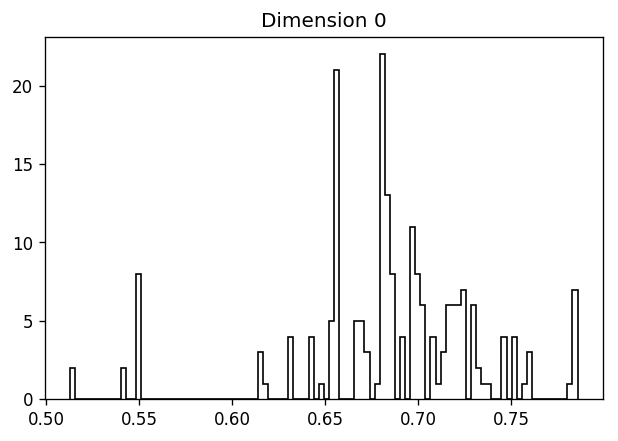

In [202]:
for i in range(ndim):
    plt.figure()
    plt.hist(np.exp(-np.exp(get_ln_tau_0(sampler.flatchain[:,i]))), 100, color="k", histtype="step")
    plt.title("Dimension {0:d}".format(i))

In [203]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.345


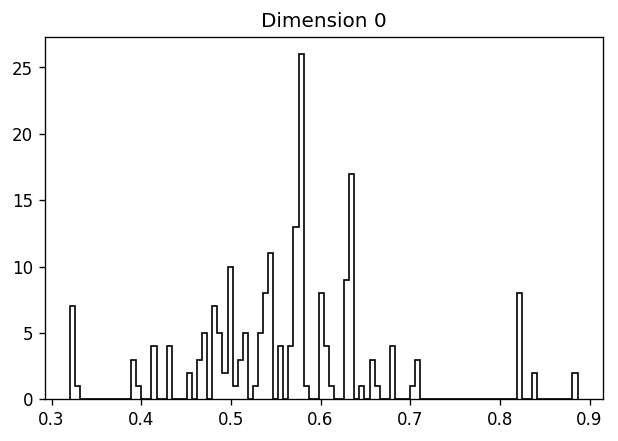

In [204]:
for i in range(ndim):
    plt.figure()
    plt.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    plt.title("Dimension {0:d}".format(i))

In [214]:
xs=np.linspace(0.0,1.0,100)

In [215]:
lnps=[lnprob([x],data,cosmo_fid,emu,rec_cosmo,linP_Mpc_params) for x in xs]

[0.0] log like = -21885.8954417
[0.010101010101010102] log like = -21529.5159071
[0.020202020202020204] log like = -21488.3381192
[0.030303030303030304] log like = -21487.2780233
[0.040404040404040407] log like = -21440.8108923
[0.050505050505050511] log like = -21439.7916085
[0.060606060606060608] log like = -21438.7927309
[0.070707070707070718] log like = -21437.8142593
[0.080808080808080815] log like = -21314.3395277
[0.090909090909090912] log like = -20811.1105639
[0.10101010101010102] log like = -20539.9546009
[0.11111111111111112] log like = -20539.0577537
[0.12121212121212122] log like = -19947.4159067
[0.13131313131313133] log like = -19946.5598716
[0.14141414141414144] log like = -19876.3531436
[0.15151515151515152] log like = -18873.4729372
[0.16161616161616163] log like = -18555.8884025
[0.17171717171717174] log like = -18555.1139917
[0.18181818181818182] log like = -18049.192612
[0.19191919191919193] log like = -18282.2845185
[0.20202020202020204] log like = -18054.8648744


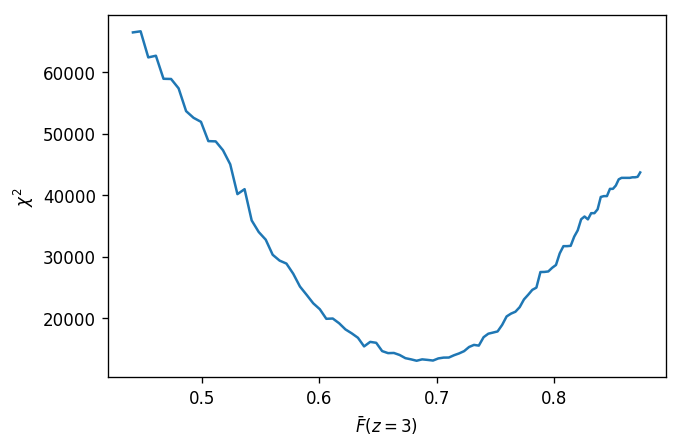

In [227]:
plt.plot(np.exp(-np.exp(get_ln_tau_0(xs))),-2.0*np.array(lnps))
plt.xlabel(r'$\bar F(z=3)$')
plt.ylabel(r'$\chi^2$')